In [4]:
import requests

r = requests.get('https://gist.githubusercontent.com/anvarnurullin/b286b067d348ca2e36f032c5b65f6cb9/raw/0384cba14ab39096d4e59b689043501a315170e4/articles.json')

data = r.json()

#make loop through the data and get the source
sources = []
for i in data:
    sources.append(i['source'])

#get text from pdf files and put them into a txt file
import PyPDF2
import io

pdfs_text = []
for i in sources:
    r = requests.get(i)
    f = io.BytesIO(r.content)
    pdfReader = PyPDF2.PdfReader(f, strict=False)
    number_of_pages = pdfReader.getNumPages()
    for page_number in range(number_of_pages):
        page = pdfReader.getPage(page_number)
        page_content = page.extractText()
        pdfs_text.append(page_content)

with open('pdfs_text.txt', 'w') as f:
    for item in pdfs_text:
        f.write("%s " % item)

#tokenize the pdfs_text.txt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

tokens = []
with open('pdfs_text.txt', 'r') as f:
    for line in f:
        tokens.append(word_tokenize(line))

#remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = []
for i in tokens:
    filtered_tokens.append([w for w in i if not w in stop_words])

#stemming
ps = PorterStemmer()
stemmed_tokens = []
for i in filtered_tokens:
    stemmed_tokens.append([ps.stem(w) for w in i])

#lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = []
for i in stemmed_tokens:
    lemmatized_tokens.append([lemmatizer.lemmatize(w) for w in i])

#make a dictionary of words and their frequencies
from collections import Counter

words = []
for i in lemmatized_tokens:
    words.extend(i)

#remove punctuation from the list of words
import string
import re
punctuation = string.punctuation
filtered_words = []
for i in words:
    if i not in punctuation and i != re.search(r'\d', i) and len(i) > 3:
        filtered_words.append(i)

#make a dictionary of words and their frequencies
words_freq = Counter(filtered_words)

#make a list of the most frequent words
most_freq_words = []
for i in words_freq.most_common(10):
    most_freq_words.append(i[0])


Illegal character in Name Object (b'/ABCDEE+Times New Roman \xcf\xee\xeb\xf3\xe6\xe8\xf0\xed\xfb\xe9,Bold')
Illegal character in Name Object (b'/ABCDEE+Times New Roman \xcf\xee\xeb\xf3\xe6\xe8\xf0\xed\xfb\xe9,Bold')
Illegal character in Name Object (b'/ABCDEE+Times New Roman \xcf\xee\xeb\xf3\xe6\xe8\xf0\xed\xfb\xe9,Bold')
Illegal character in Name Object (b'/ABCDEE+Times New Roman \xcf\xee\xeb\xf3\xe6\xe8\xf0\xed\xfb\xe9,Bold')
Illegal character in Name Object (b'/ABCDEE+Times New Roman \xcf\xee\xeb\xf3\xe6\xe8\xf0\xed\xfb\xe9,Bold')
Illegal character in Name Object (b'/ABCDEE+Times New Roman \xcf\xee\xeb\xf3\xe6\xe8\xf0\xed\xfb\xe9,Bold')
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/anvarnurullin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anvarnurullin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Us

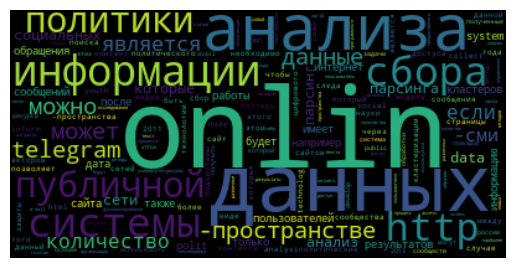

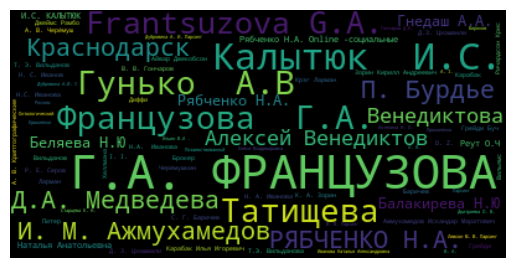

In [5]:
#make a word cloud of the most frequent words from filtered_words list
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud().generate_from_frequencies(dict(Counter(filtered_words)))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#extract names from filtered_words and make a word cloud of the most frequent names which are longer than 4 characters

from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,

    Doc
)

segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)

tokens = []
with open('pdfs_text.txt', 'r') as f:
    for line in f:
        tokens.append(line)

names = []
for i in tokens:
    doc = Doc(i)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    doc.tag_ner(ner_tagger)
    for span in doc.spans:
        if span.type == 'PER':
            names.append(span.text)

filtered_names = []
for i in names:
    if len(i) > 4:
        filtered_names.append(i)

wordcloud = WordCloud().generate_from_frequencies(dict(Counter(filtered_names)))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()